Jupyter notebook extensions used for ease of coding:

    1. Jupyter TabNine - Used to autodetect "functions" of the libraries.
    2. ScratchPad - Used to run a cell seperate from the notebook. Useful for checking the content of a variable or to test separate code chunks before implementing it in the notebook.
    3. Code Prettify - Used to automatically give proper formatting to codes written.
    4. Variable Inspector - Used to see the type and contents of variables stored.
    5. Snippets - Used to store pre-written codes and add them anywhere in the notebook. Recommend using this to store codes that you make and use often in your programs.
    6. highlighter - Used to highlight texts.

Step 1: First we import all the specific libraries that are needed for our data analysis. 
Library Explanations:

    1. The library numpy is used to work on arrays with flexibility. In this case it has been used to get the object np.nan for empty value cells in the Data.csv. 
    2. The matplotlib.pyplot library is used for various mathematical plots.
    3. The pandas library is used to read, create, manipulate datasets. 
    4. The sklearn library has various ready for use "functions" that can be used for many complex tasks.
    5. The seaborn library is used to make plots from pandas dataframe objects with minimal code, it should be noted that the matplotlib.pyplot library is still required to see the plots produced by seaborn.

Note: I am using "functions" as a umbrella term for attributes, methods etc. I will try to elaborate more whenever it is necessary.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [19]:
df = pd.read_csv('Data.csv')

Step 2:
Now we will use the pandas library, which we imported with the name pd, to read a dataset that we have saved with the name Data.csv .
pd.read_csv('file_name') : We imported pandas as 'pd'. So now we are calling a method from pandas using pd. This particular method is used to read csv files and store it as a dataframe in a variable, in this case we are storing the dataset as a dataframe object in 'df' variable.

Then we open the ScratchPad and check what we have stored in df.
Here we have checked the df variable:
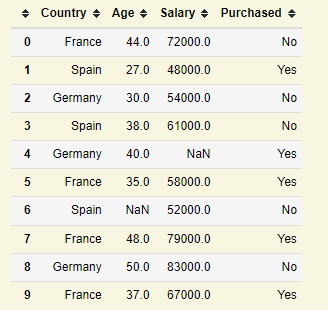

The indexing system of python starts from 0, hence following that pattern the columns with their respective index are: "Country"-0 "Age"-1 "Salary"-2 "Purchashed"-3
We can see that there are two NaN, or empty values in the "Age" and "Salary" columns. Our first step is to fill these values using the mean of the values of "Age" and "Salary" column. To do this we first need to seperate these column values from the dataframe. We will do this by using the DataFrame.iloc[] function of pandas. 

<span class="girk">Note: our "df" variable here is a DataFrame type object of pandas.</span> 

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

X = df.iloc[:, :-1].values takes all the values from "Country"-0 to "Salary"-2 and excludes the last column "Purchased"-3 and stores these values in the variable X. Again we open up the ScratchPad and see what we have in X.

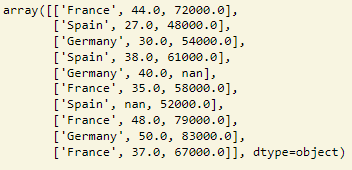

y = df.iloc[:, 3].values takes all the values from "Purchased"-3 and stores them in the variable y. Again we check what we have in y in ScratchPad.

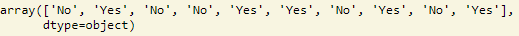

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

Recall that we imported this:
from sklearn.impute import SimpleImputer

We will now use the SimpleImputer from sklearn to fill the missing values in "Age"-1 and "Salary"-2 columns.
To understand how the SimpleImputer works we need to grasp the arguments we pass on to it.

First Parameter: missing_values
missing_values = int/ float/ str/ np.nan/ None
We can set this parameter to either one of the five values above. According to what value we give it, it will interpret those data types as "missing" and will replace them based on a strategy-which is our second parameter. Note that to use the np.nan we must import the numpy library as np. 

Second Parameter: strategy
strategy = 'mean'/'median'/'most_frequent'/'constant'

Based on the strategy used the missing_values will be replaced. In our case we are replacing the empty cells in "Age"-1 and "Salary"-2 with the mean of the "Age"-1 column and "Salary"-2 column respectively.

Note: When strategy = 'constant', a third parameter fill_value will have to be passed. It is used to replace all occurrences of missing_values. If left to the default, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types.

imputer.fit(X[:, 1:3]) is used to fit the SimpleImputer with data to compute the means based on X. Note that we are only passing the columns "Age"-1 and "Salary"-2 into this, as according to python indexing the last index is not included. 

<span class="girk">It should be noted that X only has the "Country"-0, "Age"-1 and "Salary"-2 columns and doesn't have the "Purchased"-3 column, still we are using 1:3.</span>

Then we replace the X[:, 1:3] using the imputer.transform(X[:, 1:3]) based on the data we fitted the SimpleImputer with in the previous steps.

Again we check what we have in X:

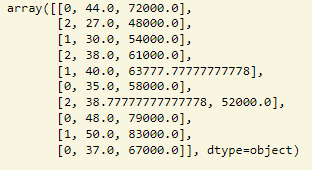

And compare this with what we had before in X:

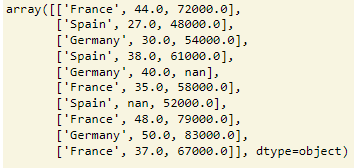

We can see that the nan values have been replaced by the means.

In [22]:
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
y = labelencoder.fit_transform(y)

Recall that we imported this:
from sklearn.preprocessing import LabelEncoder

Now the "Country"-0 column are all strings. The LabelEncoder from sklearn labels each of the countries with an integer value based on some predefined criterias from sklearn.
The fit_transorm() method fits the LabelEncoder with the data and simultaneuosly returns the transformed data based on it.

Again we check what we have in X:

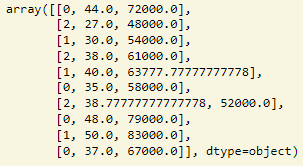

In [23]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])